## Desafio Ifood

O conjunto de dados é composto por clientes da empresa Ifood com dados sobre:
- Perfis de clientes
- Preferências do produto
- Sucessos/fracassos da campanha
- Desempenho do canal

Problema de Negócio:

`Como podemos aumentar o gasto médio dos clientes em nossa plataforma, utilizando as informações de perfil de clientes (renda, estado civil, filhos, etc.)?`


## Importando libs e os dados ##

In [1]:
#Importando bibioteca para manipulação de dados

import pandas as pd 

#Importando biblioteca para operações matematicas

import numpy as np 

#Importando biblotecas para auxiliar na visualização dos dados

import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
#Carregando os dados e lendo as primeiras linhas para analisar quais tipos de dados que temos.

df_ifood = pd.read_csv(r'C:\Users\Ana Carolina Meliti\OneDrive\Área de Trabalho\Estatística Descriti\mkt_data.csv')
df_ifood.head(5)

,Unnamed: 0,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status,education_level,kids,expenses
0,0,58138.0,0,0,58,635,88,546,172,88,...,3.0,NaN,NaN,1529,1441,0,Single,Graduation,0,1529
1,1,46344.0,1,1,38,11,1,6,2,1,...,3.0,NaN,NaN,21,15,0,Single,Graduation,2,21
2,2,71613.0,0,0,26,426,49,127,111,21,...,3.0,NaN,NaN,734,692,0,Together,Graduation,0,734
3,3,26646.0,1,0,26,11,4,20,10,3,...,3.0,NaN,NaN,48,43,0,Together,Graduation,1,48
4,4,58293.0,1,0,94,173,43,118,46,27,...,NaN,NaN,5.0,407,392,0,Married,PhD,1,407


### Análise Exploratória (EDA) ###

In [3]:
df_ifood.info()

#Verificando a quantidade de linhas e colunas, temos 44 colunas com total de 2205 linhas
#

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 44 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            2205 non-null   int64  
 1   Income                2205 non-null   float64
 2   Kidhome               2205 non-null   int64  
 3   Teenhome              2205 non-null   int64  
 4   Recency               2205 non-null   int64  
 5   MntWines              2205 non-null   int64  
 6   MntFruits             2205 non-null   int64  
 7   MntMeatProducts       2205 non-null   int64  
 8   MntFishProducts       2205 non-null   int64  
 9   MntSweetProducts      2205 non-null   int64  
 10  MntGoldProds          2205 non-null   int64  
 11  NumDealsPurchases     2205 non-null   int64  
 12  NumWebPurchases       2205 non-null   int64  
 13  NumCatalogPurchases   2205 non-null   int64  
 14  NumStorePurchases     2205 non-null   int64  
 15  NumWebVisitsMonth    

### Identificando e corrigindo valores duplicados e nulos

Não há valores duplicados

In [4]:
df_ifood.duplicated().sum() #verificando se há valores duplicados

0

Identifiquei que há alguns nulos nas colunas: 

'education_Basic';'marital_Widow','education_2n Cycle', 'marital_Divorced','education_Master', 'education_PhD', 'marital_Single', 'marital_Together', 'marital_Married', 'education_Graduation'.

Todas são variáveis categóricas nominais.

In [5]:
nulos = df_ifood.isna().sum().sort_values(ascending=False) #verificando se há valores nulos 
display(nulos)

education_Basic         2151
marital_Widow           2129
education_2n Cycle      2007
marital_Divorced        1975
education_Master        1841
education_PhD           1729
marital_Single          1728
marital_Together        1637
marital_Married         1351
education_Graduation    1092
Response                   0
Age                        0
Customer_Days              0
Unnamed: 0                 0
Income                     0
MntTotal                   0
MntRegularProds            0
AcceptedCmpOverall         0
marital_status             0
education_level            0
kids                       0
Z_Revenue                  0
Z_CostContact              0
Complain                   0
MntGoldProds               0
Kidhome                    0
Teenhome                   0
Recency                    0
MntWines                   0
MntFruits                  0
MntMeatProducts            0
MntFishProducts            0
MntSweetProducts           0
NumDealsPurchases          0
AcceptedCmp2  

Identifiquei algo que é incrível para nós, pois os valores faltantes dizem muita coisa, por exemplo a coluna marital_Single preenchida indica que este cliente é solteiro, logo ele não pode ser outro estado civil, o que na nossa base indica o NaN (ausentes em português) nas demais colunas, neste caso, faz total sentido transformarmos essas variaveis em tipos booleanos para facilitar nossa análise descritiva.

Outra coisa interessante, temos a coluna "Unnamed", não é identificada, preferi dropar ela por não conter valor e não ser especificada.

In [6]:
trata_nulos = ['marital_Widow',
          'marital_Divorced', 
          'marital_Together', 
          'marital_Single',
          'marital_Married',
          'education_2n Cycle',
          'education_Basic',
          'education_Graduation',
          'education_Master',
          'education_PhD'
          ] #criação da lista para transformação em booelanos

In [7]:
#transformando em booleanos, e usando o np.where para ele colocar 0 para não e 1 para sim

for item in trata_nulos:
  df_ifood["booleano"+str(item)] = np.where(df_ifood[item].isnull(), 0, 1)

In [8]:
df_ifood = df_ifood.drop(columns=['Unnamed: 0']) #Removendo a coluna Unnamed

### Análise descritiva ###

Mapeando a média, mediana, percentis, mínimo e máximo de cada uma das colunas numéricas.

In [9]:
numericos = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64'] #criando uma lista para mostrar somente as colunas numéricas para facilitar a identificação pelo tipo.
df_ifood.select_dtypes(include=numericos).columns 

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall', 'kids', 'expenses', 'booleanomarital_Widow',
       'booleanomarital_Divorced', 'booleanomarital_Together',
       'booleanomarital_Single', 'booleanomarital_Married',
       'booleanoeducation_2n Cycle', 'booleanoeducation_Basic',
       'booleanoeducation_Graduation

Preferi separar por grupos para identificamos a análise descritiva das nossa variáveis numéricas:

- Marital Status = 'booleanomarital_Widow','booleanomarital_Divorced', 'booleanomarital_Together','booleanomarital_Single', 'booleanomarital_Married',
- Education_status = 'booleanoeducation_2n Cycle', 'booleanoeducation_Basic','booleanoeducation_Graduation', 'booleanoeducation_Master','booleanoeducation_PhD'
- Purchases: 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'
- Customer: 'Income', 'Kidhome', 'Teenhome', 'Recency','Age', 'Customer_Days', 
- Gastos: 'MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds', 'MntTotal'
- Campanha: 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'AcceptedCmpOverall', 

Diante disso, vamos responder as perguntas: Qual é a média, mediana, 25 percentil, 75 percentil, mínimo e máximo de cada uma das colunas numéricas? 

In [10]:
#Verificando a estatística descritiva de um todo do dataset

describe = df_ifood.describe()
describe = round(describe, 4) #arredondando os resultados para facilitar a compreensão
display(describe)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,booleanomarital_Widow,booleanomarital_Divorced,booleanomarital_Together,booleanomarital_Single,booleanomarital_Married,booleanoeducation_2n Cycle,booleanoeducation_Basic,booleanoeducation_Graduation,booleanoeducation_Master,booleanoeducation_PhD
count,2205.0000,2205.0000,2205.0000,2205.0000,2205.0000,2205.0000,2205.0000,2205.0000,2205.0000,2205.0000,...,2205.0000,2205.0000,2205.0000,2205.0000,2205.0000,2205.0000,2205.0000,2205.0000,2205.0000,2205.0000
mean,51622.0948,0.4422,0.5066,49.0091,306.1646,26.4032,165.3120,37.7565,27.1283,44.0571,...,0.0345,0.1043,0.2576,0.2163,0.3873,0.0898,0.0245,0.5048,0.1651,0.2159
std,20713.0638,0.5371,0.5444,28.9321,337.4938,39.7845,217.7845,54.8246,41.1305,51.7362,...,0.1825,0.3057,0.4374,0.4118,0.4872,0.2860,0.1546,0.5001,0.3713,0.4115
min,1730.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,35196.0000,0.0000,0.0000,24.0000,24.0000,2.0000,16.0000,3.0000,1.0000,9.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,51287.0000,0.0000,0.0000,49.0000,178.0000,8.0000,68.0000,12.0000,8.0000,25.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
75%,68281.0000,1.0000,1.0000,74.0000,507.0000,33.0000,232.0000,50.0000,34.0000,56.0000,...,0.0000,0.0000,1.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000
max,113734.0000,2.0000,2.0000,99.0000,1493.0000,199.0000,1725.0000,259.0000,262.0000,321.0000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


**Mapeando o perfil dos clientes**

- Qual é o maior salário encontrado na nossa base?

O maior salário de 113.7K e o menor 1.7K

- Qual é a distribuição de salário na nossa base? Temos clientes que ganham muito bem e outros que não ganham muito bem? 


Diante do nosso histograma, é simetrico a distribuição de salários, a nossa média está em 51.6K e nossa mediana em 51.2K com pouca diferença, temos uma distribuição normal, onde há clientes que ganham melhor e poucos clientes que não ganham tão bem.



<Axes: xlabel='Income', ylabel='Count'>

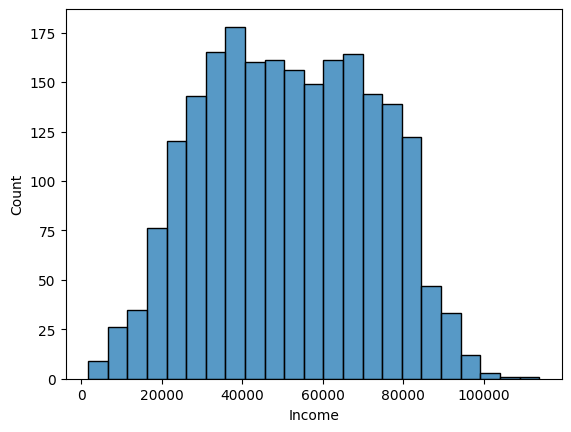

In [11]:
sns.histplot(df_ifood.Income) #plotando histograma para analisar se há assimetria em nosso gráfico

<Axes: ylabel='Income'>

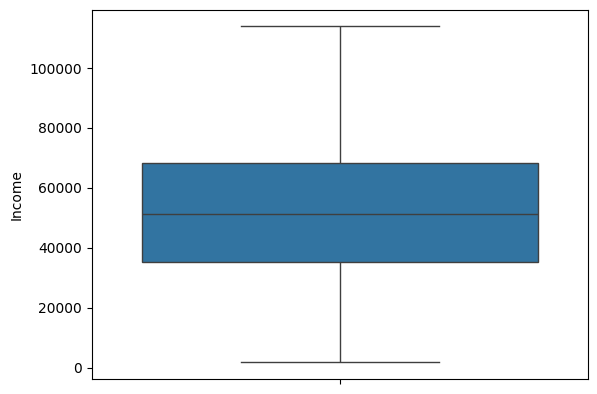

In [12]:
sns.boxplot(df_ifood.Income) #plotando boxplot para identificar se os resultados estão conferindo com o histograma

Para entendermos que há uma normalidade em nosso histograma, vamos calcular a variância e o SKEW.

Nosso skew está em normalidade apesar da curva ser um pouco destoada, porém ela permanece assimétrica. 

In [13]:
variancia = round(df_ifood['Income'].std()/df_ifood['Income'].mean(),4) #calculandoa  variância

skew = round(df_ifood['Income'].skew(),5) #calculando o skew

display(f"Nossa variância é de: {variancia}")
display(f"Nosso skew é de: {skew}")

'Nossa variância é de: 0.4012'

'Nosso skew é de: 0.01316'

## Nossos clientes tem níveis de educação maiores ou menores?

Nossa distribuição de educação está em:

- *Education_nivel2 - 9%*
- *Education_basic - 2%*
- *Education-Graduation - 50%*
- *Education_Master - 17%*
- *Education_PhD - 22%*

Diante disso 89% dos clientes possuem graduação completa ou acima disso, e apenas 11% possuem educação básica, é possível afirmar que nossos clientes tem níveis de educação maiores. 

In [14]:
total_education = round(df_ifood[['booleanoeducation_2n Cycle',
         'booleanoeducation_Basic',
         'booleanoeducation_Graduation',
         'booleanoeducation_Master',
         'booleanoeducation_PhD']].mean().sort_values(ascending=False) * 100, 2) #cálculando a média de educação por nível

display(total_education)


booleanoeducation_Graduation    50.48
booleanoeducation_PhD           21.59
booleanoeducation_Master        16.51
booleanoeducation_2n Cycle       8.98
booleanoeducation_Basic          2.45
dtype: float64

<Axes: xlabel='education_level', ylabel='count'>

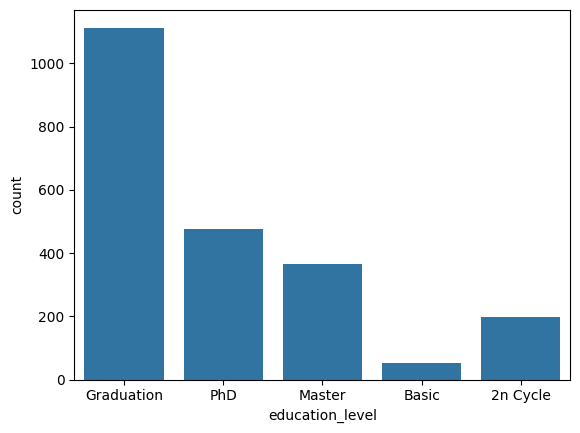

In [15]:
sns.countplot(x=df_ifood['education_level']) #contabilizando em gráfico a quantidade de clientes por nível de educação


E como está a distribuição dos nossos clientes em relação ao estado civil?

Nossa base de clientes está distribuida dessa maneira no estado civil:

* *Viúvos(as) - 3%*
* *Divorciados(as) - 10%*
* *União Estável - 26%*
* *Solteiros(as) - 22%*
* *Casados - 39%*

Clientes com estado civil casado ou união estável ocupam a maior parte da nossa base. 

In [16]:
total_marital = round(df_ifood[['booleanomarital_Widow',
                                'booleanomarital_Divorced',
                                'booleanomarital_Together',
                                'booleanomarital_Single',
                                'booleanomarital_Married']].mean().sort_values(ascending=False) * 100, 2) #cálculando a média de clientes por estado civil

display(total_marital)

booleanomarital_Married     38.73
booleanomarital_Together    25.76
booleanomarital_Single      21.63
booleanomarital_Divorced    10.43
booleanomarital_Widow        3.45
dtype: float64

<Axes: xlabel='marital_status', ylabel='count'>

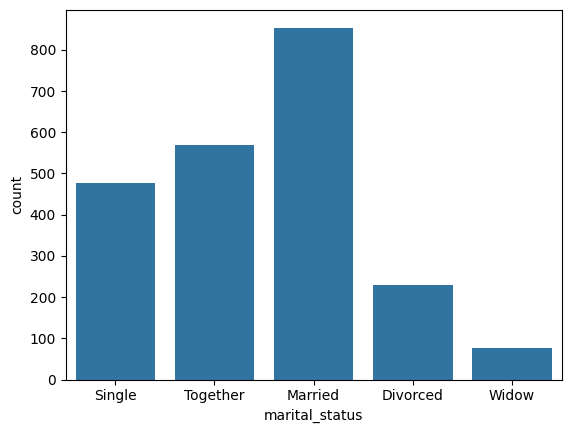

In [17]:
sns.countplot(x=df_ifood['marital_status']) #contabilizando em gráfico a quantidade de clientes por estado civil

## Correlacionando os dados ##

Vamos criar algumas hipoteses para trabalharmos em cima delas.

- Qual é a relação de estado civil com número de filhos? Será que as pessoas casadas têm um maior número de filhos? 

Não é possível afirmar a relação de estado civil com filhos, a média de filhos para pessoas casadas é de 1 filho ou nenhum, teriamos que testar hipoteses para concluimos melhor.


In [18]:
media_kids = df_ifood.groupby('marital_status')['kids'].mean() #cálculando a média de filhos por estado civil
display(media_kids)

marital_status
Divorced    1.008696
Married     0.967213
Single      0.859539
Together    0.980634
Widow       0.881579
Name: kids, dtype: float64

In [19]:
df_ifood.groupby(['marital_status'])['kids'].describe() #verificando as tendencias estatísticas por estado civiil em relação à quantidade de filhos 

,count,mean,std,min,25%,50%,75%,max
marital_status,,,,,,,,
Divorced,230.0,1.008696,0.741716,0.0,1.0,1.0,1.0,3.0
Married,854.0,0.967213,0.732019,0.0,0.0,1.0,1.0,3.0
Single,477.0,0.859539,0.777289,0.0,0.0,1.0,1.0,3.0
Together,568.0,0.980634,0.749823,0.0,0.0,1.0,1.0,3.0
Widow,76.0,0.881579,0.747745,0.0,0.0,1.0,1.0,2.0


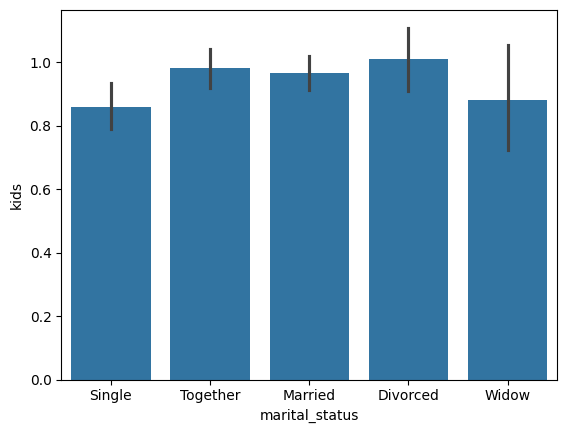

In [22]:
fig1 = sns.barplot(x='marital_status', y='kids', data=df_ifood) #plotando boxplot para compreender se há correlação entre as variáveis

As pessoas gastam mais ou menos em nossa plataforma quando têm filhos?

Podemos afirmar que pessoas com mais filhos gastam menos em relação à pessoas com menos filhos ou nenhum filho, a média de gasto quando se têm 3 filhos é de 237,38, quando vemos pessoas com 2 filhos cai um pouco para 221,57 e quando vemos pessoas com apenas um filho a média sobe para 434,53 e quando não há filhos a média é de 1K. 

In [ ]:
expense_mean = round(df_ifood.groupby(['kids'])['expenses'].mean(),2) #cálculo a média de crianças e a média de gastos
expense_median = round(df_ifood.groupby(['kids'])['expenses'].median(),2) #cálculando a mediana de crianças e a mediana de gastos

print(expense_mean)
print(expense_median)

kids
0    1041.21
1     434.53
2     221.57
3     237.38
Name: expenses, dtype: float64
kids
0    1106.5
1     264.0
2      84.0
3      62.0
Name: expenses, dtype: float64


<Axes: xlabel='kids', ylabel='expenses'>

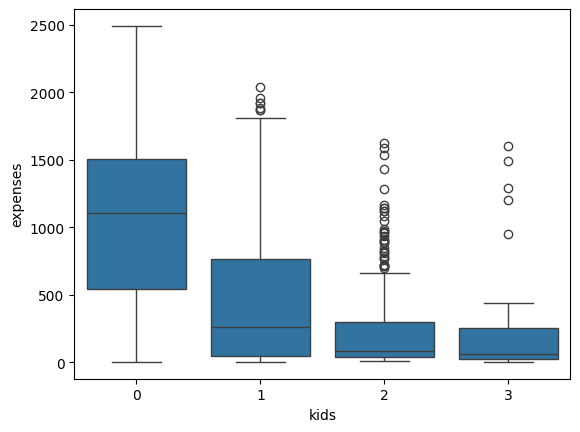

In [ ]:
sns.boxplot(x='kids', y='expenses', data=df_ifood) #plotando em boxplot para identificar se nossa hipotese é válida ou não

Para entendermos a hipotese mencionada acima, vamos analisar a média de gasto por estado civil.

A diferença entre os estados civis e seus gastos são poucas. 

marital_status
Divorced    569.05
Married     546.65
Single      569.27
Together    564.35
Widow       672.11
Name: expenses, dtype: float64

<Axes: xlabel='marital_status', ylabel='expenses'>

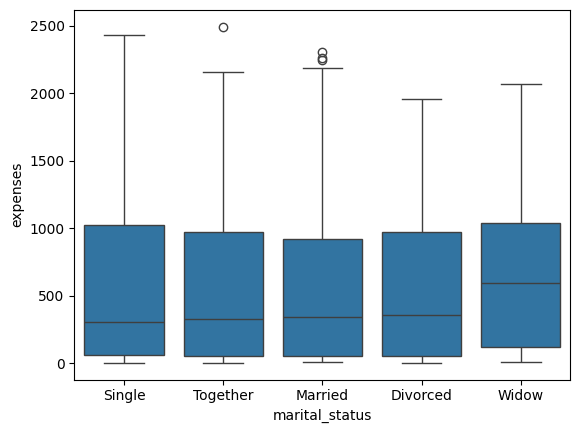

In [ ]:
media_expense = df_ifood.groupby(['marital_status'])['expenses'].mean() #cálculando a média de gastos por estado civil
display(round(media_expense,2))

sns.boxplot(x='marital_status', y='expenses', data=df_ifood) #plotando em boxplot para identificar padrões

- Pessoas que têm um maior salário gastam mais? 

Como nosso histograma tem crescimento para cima, indica uma correlação positiva nesse caso, mas para tirarmos mais a limpo, fiz a correlação entre as variáveis que indicou 0,8230, ou seja, é positiva. 

<Axes: xlabel='Income', ylabel='expenses'>

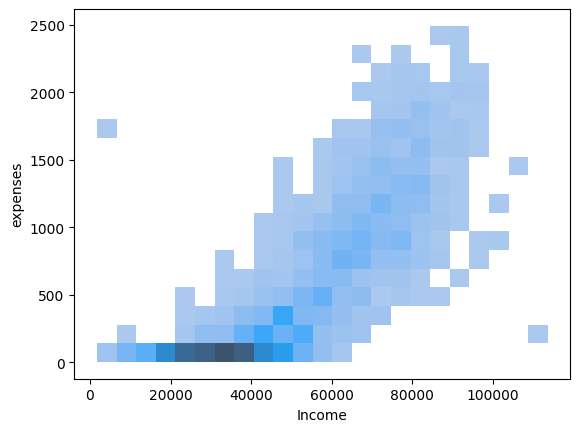

In [ ]:
sns.histplot(x='Income', y='expenses', data=df_ifood) #plotando histograma para analisar correlação de salários maiores com maiores gastos

In [23]:
df_ifood["expenses"].corr(df_ifood['Income']) * 100 #cálculando a correlação de person entre as duas variáveis

82.30660021398378

Verificando como foi a aceitação da campanha do marketing em relação aos nossos clientes

<Axes: xlabel='AcceptedCmpOverall', ylabel='expenses'>

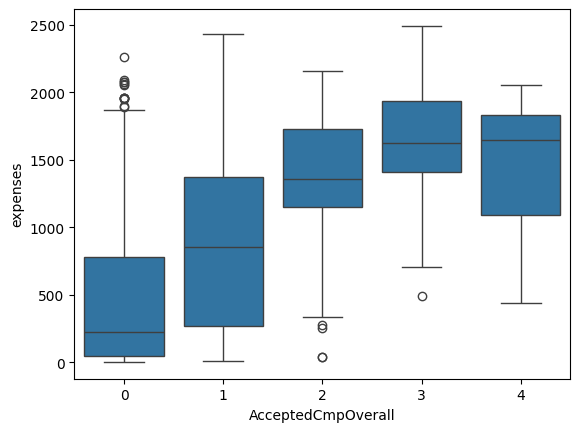

In [ ]:
sns.boxplot(x='AcceptedCmpOverall', y='expenses', data=df_ifood) #plotando boxplot para identificar se há correlação entre aceitação maior e gastos.

In [ ]:
df_ifood.groupby(['AcceptedCmpOverall'])['expenses'].mean() #cálculando a média de gasto conforme a aceitação geral

AcceptedCmpOverall
0     440.551803
1     855.767081
2    1341.950617
3    1615.840909
4    1445.454545
Name: expenses, dtype: float64

In [24]:
df_ifood['AcceptedCmpOverall'].corr(df_ifood['expenses']) * 100 #cálculando a correlação de person em relação da aceitação geral com aumento de gastos

46.12794037688634

Os clientes que mais tiveram aceitação em nossas campanhas considerando foram clientes casados e morando juntos, mas para filtrar melhor, quanto menos filhos, ou seja um ou nenhum, maiores são as aceitações e os gastos.

In [ ]:
df_ifood.groupby(['marital_status'])['AcceptedCmpOverall'].count() #contando a quantidade de aceitação geral por estado civil

marital_status
Divorced    230
Married     854
Single      477
Together    568
Widow        76
Name: AcceptedCmpOverall, dtype: int64

In [ ]:
df_ifood.groupby(['marital_status', 'kids'])['AcceptedCmpOverall'].count() #contando a aceitação geral por estado civil e quantidade de filhos

marital_status  kids
Divorced        0        57
                1       119
                2        49
                3         5
Married         0       227
                1       444
                2       167
                3        16
Single          0       168
                1       222
                2        73
                3        14
Together        0       150
                1       294
                2       109
                3        15
Widow           0        26
                1        33
                2        17
Name: AcceptedCmpOverall, dtype: int64

É possível afirmar moderadamente que clientes que tem maior aceitação de campanhas, possuem uma elevação em seus gastos, ou seja, há uma uma correlação moderada positiva quanto a isso, sugerindo que campanhas eficazes podem ser uma estratégia relevante para aumentar o consumo dos clientes.

## Resolucionando o problema de négocio ## 